### 1. 유방암 데이터를 활용하여 Ensemble 모델을 학습해보자
- wisconsin의 유방암 데이터셋 활용
- 총 569건의 데이터(악성-212, 양성-357)

In [3]:
# 데이터셋 불러오기
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
cancer_data

# 데이터 형태 : 전체적인 형태 - 딕셔너리 구조, bunch 객체

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
# 딕셔너리 구조에서 데이터 확인 : 키 값들을 확인
# keys()
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
# 분류에 사용할 특성 확인 --> 학습에 사용할 데이터의 이름, 개수 확인
print(cancer_data.feature_names)
print(len(cancer_data.feature_names))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [7]:
# 각 특성들의 자료형 확인
print("유방암 데이터의 자료형 : ", type(cancer_data.data))

유방암 데이터의 자료형 :  <class 'numpy.ndarray'>


In [8]:
# 유방암 데이터 셋의 크기 확인
cancer_data.data.shape

(569, 30)

In [9]:
# 양성(357)과 악성(212) 데이터 수 확인
# 정답 레이블(클래스)의 이름 --> cancer_data.target_names
# 클래스별(범주별) 개수를 반환 ==> bincount() - numpy에 있는 함수
# 동일한 개수로 이루어진 2개 이상의 데이터를 연결하는 함수 ==> zip()
# zip() ==> 악성 : 00명, 양성 : 00명

In [10]:
import numpy as np

In [11]:
for i, j in zip(cancer_data.target_names, np.bincount(cancer_data.target)):
    print({i : j})

{'malignant': 212}
{'benign': 357}


### 2. 훈련 데이터와 테스트 데이터로 분리 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# 7 : 3
# random_state = 10

X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.3, random_state = 10)

In [14]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

### 3. RandomForest 모델 적용하기
- n_estimators : 몇 개의 트리를 만들지 선택 ==> (100개)
- random_state = 10
- max_features : 선택할 특징의 최대 수( 0.3 ~ 0.7 )
    - 0 : 특성을 사용하지 않겠다. 1. 전체 특성을 사용하겠다. 
    - max_features의 값을 늘이는 경우 : 개별 트리가 적을 때, 
    - max_features의 값을 줄이는 경우 : 개별 트리가 많을 때

In [15]:
# 필요한 라이브러리 꺼내오기
from sklearn.ensemble import RandomForestClassifier

# 모델 생성 및 하이퍼 파라미터 튜닝
forest_model = RandomForestClassifier(n_estimators = 100, random_state = 10)

# 모델 학습
forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [16]:
# 교차검증으로 평가 : cv = 5
from sklearn.model_selection import cross_val_score
cross_val_score(forest_model, X_train, y_train, cv = 5).mean()

0.959746835443038

In [17]:
# 학습 및 테스트 데이터를 이용하여 예측값 만들기
train_pred = forest_model.predict(X_train)
test_pred = forest_model.predict(X_test)

In [18]:
# 예측 결과 확인
print("학습 데이터를 이용한 예측 결과 : \n", train_pred)
print("테스트 데이터를 이용한 예측 결과 : \n", test_pred)

학습 데이터를 이용한 예측 결과 : 
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
테스트 데이터를 이용한 예측 결과 : 
 [0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1

In [19]:
# 학습 및 테스트 데이터에 대한 분류 모델의 성능(평균의 정확도) 확인
from sklearn.metrics import accuracy_score

# {:.3f} 평균값을 소수 3자리까지만 표현 - 포매팅
print("학습 데이터 정확도 : {:.3f}".format(accuracy_score(y_train, train_pred)))
print("테스트 데이터 정확도 : {:.3f}".format(accuracy_score(y_test, test_pred)))

학습 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.982


### GridSearchCV를 적용하여 모델의 성능 향상시키기

In [24]:
# GridSearchCV 불러오기
from sklearn.model_selection import GridSearchCV

# 1. 튜닝할 하이퍼 파라미터 설정
param = {'n_estimators' : [10, 20, 30, 120, 400, 777], 
         'max_depth' : [4, 7, 13, 77],
         'max_leaf_nodes' : [2, 5, 7],
         'min_samples_split' : [10, 50, 77]}

# 2. 랜덤 포레스트 모델 생성
forest_model1 = RandomForestClassifier(random_state = 10, n_jobs = -1)
# n_jobs-=1 : 내 컴의 CPU 성능을 모두 쓰겠다.

# 3. GridSearchCV 모델 생성
grid = GridSearchCV(forest_model1, param, cv=5, scoring='accuracy', n_jobs= -1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [4, 7, 13, 77],
                         'max_leaf_nodes': [2, 5, 7],
                         'min_samples_split': [10, 50, 77],
                         'n_estimators': [10, 20, 30, 120, 400, 777]},
             scoring='accuracy')

In [25]:
# 최적의 하이퍼파라미터 조합, 성능 확인하기
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 10, 'n_estimators': 400}
0.9547468354430378


### 모델 완성 및 영향력 높은 특성 확인

In [27]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 랜덤포레스트 모델 완성하기 
best_model = RandomForestClassifier(max_depth = 4, 
                                    max_leaf_nodes = 5, 
                                    min_samples_split = 10, 
                                    n_estimators = 400)

# 학습
best_model.fit(X_train, y_train)

# 영향력 높은 특성 추출하기 ==> feature_importances_
features = best_model.feature_importances_
print('features \n', features)

features 
 [0.04186904 0.00872426 0.0711854  0.04585082 0.0029594  0.0079093
 0.0670375  0.07334908 0.0008956  0.0015267  0.01256584 0.00080632
 0.01021131 0.03578573 0.00071211 0.00172164 0.00431421 0.00063115
 0.00079274 0.00101382 0.12309055 0.00922576 0.14935043 0.12150407
 0.01006652 0.01508048 0.03780897 0.13480796 0.00482344 0.00437985]


In [30]:
# 영향력 높은 특성들을 데이터 프레임으로 만들기
df = pd.DataFrame(features, index=cancer_data.feature_names, columns=['importances'])
# 특성의 중요도 값 순위로 정렬(내림차순)
df1 = df.sort_values(by='importances')

<Axes: >

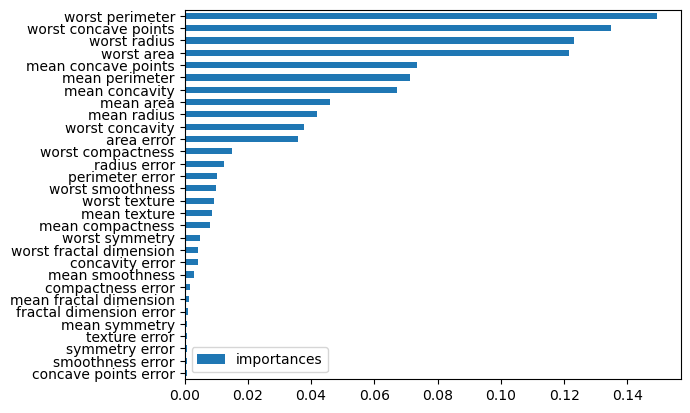

In [31]:
# DataFrame.plot.barh() 함수를 이용한 시각화
df1.plot.barh()

In [34]:
# feature_importances_를 이용하여 영향력 높은 특성 확인
# 특성의 중요도를 시각화하는 함수 정의

def plot_feature_importance(columns, features, num) :
    # 축 번호별로 중요도 그래프를 그림
    plt.barh(range(num), features)
    # 축 번호에 축 이름을 출력
    plt.yticks(np.arange(num), columns)
    plt.xlabel('feature importances')
    plt.ylabel('feature')
    plt.ylim(-1,num)
    plt.show()

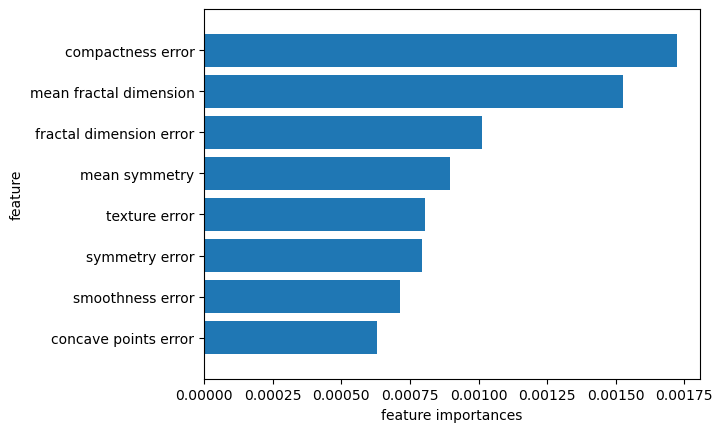

In [35]:
plot_feature_importance(df1.index[:8], df1.iloc[:8, 0], df1.iloc[:8].shape[0])

### AdaBoost 모델 적용하기
- 결정트리 기반의 모델이지만, 각각의 트리들이 독립적으로 존재하지 않음
- 사전 가지치기 파라미터들을 사용할 수 없음
- 이전 모델이 잘못 분류한 샘플에 대해서는 가중치를 높여서 다음 모델을 훈련시킴
- n_estimators : 사용할 결정트리의 개수
- learning_rate(학습률) : 가중치 갱신의 변동 폭을 조정, 0 ~ 1 사이의 값, 기본값 1
    - 값이 크면 --> 과대적합
    - 값이 작으면 --> 과소적합

In [36]:
# AdaBoost 불러오기
from sklearn.ensemble import AdaBoostClassifier

# 모델 생성 및 하이퍼 파라미터 설정
ada_model = AdaBoostClassifier(n_estimators = 50, random_state = 10)

# 학습
ada_model.fit(X_train, y_train)

AdaBoostClassifier(random_state=10)

In [37]:
# 학습 및 테스트 데이터를 이용하여 예측값 만들기
train_pred = ada_model.predict(X_train)
test_pred = ada_model.predict(X_test)

# 예측 결과 확인
print('학습 데이터를 이용한 예측 결과 : \n', train_pred)
print('테스트 데이터를 이용한 예측 결과 : \n', test_pred)

# {:.3f} 평균값을 소수 3자리까지만 
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred))) 
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

학습 데이터를 이용한 예측 결과 : 
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
테스트 데이터를 이용한 예측 결과 : 
 [0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1

### GBM 모델 적용하기
- 여러 개의 결정트리를 묶어서 강력한 모델을 만드는 앙상블 방법
- 강력한 사전 가지치기 적용(max_depth의 기본값 : 3)
- 예측 성능은 높지만 과대적합이 빠르게 되고, 시간이 오래걸린다는 단점
- max_depth를 작게 설정하여 트리의 깊이가 5보다 깊어지지 않게 해야 함
- 가중치를 계산할 때 경사하강법 사용

In [38]:
# GBM 모델 불러오기
from sklearn.ensemble import GradientBoostingClassifier

# 모델 생성 및 하이퍼파라미터 설정
gbm_model = GradientBoostingClassifier(random_state = 10)

# 학습
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=10)

In [39]:
# 학습 및 테스트 데이터를 이용하여 예측값 만들기
train_pred = gbm_model.predict(X_train)
test_pred = gbm_model.predict(X_test)

# 예측 결과 확인
print('학습 데이터를 이용한 예측 결과 : \n', train_pred)
print('테스트 데이터를 이용한 예측 결과 : \n', test_pred)

# {:.3f} 평균값을 소수 3자리까지만 
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred))) 
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

학습 데이터를 이용한 예측 결과 : 
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
테스트 데이터를 이용한 예측 결과 : 
 [0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1

### XGBoost 모델 적용하기
- 결정트리 기반의 앙상블 모델에서 가장 각광받고 있는 알고리즘(모델)의 하나
- 분류에 있어서 일반적으로 다른 머신러닝 모델보다 뛰어난 성능을 나타냄
- GBM 기반이지만 GBM의 단점을 해결
    - 느린 학습시간 ==> Early Stopping 기능
    - 과대적합 ==> 과대적합을 방지하는 규제가 포함
- 대규모 머신러닝 문제에서 GBM을 적용하는 경우 ==> XGBoost 사용

In [40]:
# sklearn에서 제공하지 않는 모듈
# XGBoost 패키지 설치
! pip install xgboost

     --------------------------------------- 70.9/70.9 MB 13.1 MB/s eta 0:00:00


In [41]:
# XGBoost 불러오기
from xgboost import XGBClassifier

# 모델 생성 및 하이퍼파라미터 설정(x)
xgb_model = XGBClassifier(random_state = 10)

# 학습
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=10, ...)

In [42]:
# 학습 및 테스트 데이터를 이용하여 예측값 만들기
train_pred = xgb_model.predict(X_train)
test_pred = xgb_model.predict(X_test)

# 예측 결과 확인
print('학습 데이터를 이용한 예측 결과 : \n', train_pred)
print('테스트 데이터를 이용한 예측 결과 : \n', test_pred)

# {:.3f} 평균값을 소수 3자리까지만 
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred))) 
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

학습 데이터를 이용한 예측 결과 : 
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
테스트 데이터를 이용한 예측 결과 : 
 [0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1

### Light GBM 적용하기
- XGBoost에 비해 가벼워 속도가 빠른 모델
- 비대칭(수직)트리분할로 균형을 맞추지 않음 ==> 속도가 빠름
- 학습을 반복할 수록 균형 트리보다 예측 오류의 손실 최소화
- 깊이가 깊은 비대칭트리 생성 ==> 과적합이 쉽다

In [43]:
# Light GBM 패키지 설치하기
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 21.0 MB/s eta 0:00:00


In [44]:
# Light GBM 불러오기
import lightgbm

In [46]:
from lightgbm.sklearn import LGBMClassifier

# 모델 생성 및 하이퍼파라미터 설정(x)
lgbm_model = LGBMClassifier(random_state = 10)

# 학습
lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 245, number of negative: 153
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3972
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.615578 -> initscore=0.470820
[LightGBM] [Info] Start training from score 0.470820
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier(random_state=10)

In [47]:
# 학습 및 테스트 데이터를 이용하여 예측값 만들기
train_pred = lgbm_model.predict(X_train)
test_pred = lgbm_model.predict(X_test)

# 예측 결과 확인
print('학습 데이터를 이용한 예측 결과 : \n', train_pred)
print('테스트 데이터를 이용한 예측 결과 : \n', test_pred)

# {:.3f} 평균값을 소수 3자리까지만 
print('학습 데이터 정확도 : {:.3f}'.format(accuracy_score(y_train, train_pred))) 
print('테스트 데이터 정확도 : {:.3f}'.format(accuracy_score(y_test, test_pred)))

학습 데이터를 이용한 예측 결과 : 
 [1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0]
테스트 데이터를 이용한 예측 결과 : 
 [0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1